In [402]:
# Installations
!pip install kagglehub

In [403]:
# Imports
# Data Handling
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error




In [404]:
df = pd.read_csv("./data/HEALTHCAREEE.csv")

In [405]:
df.shape

(55500, 16)

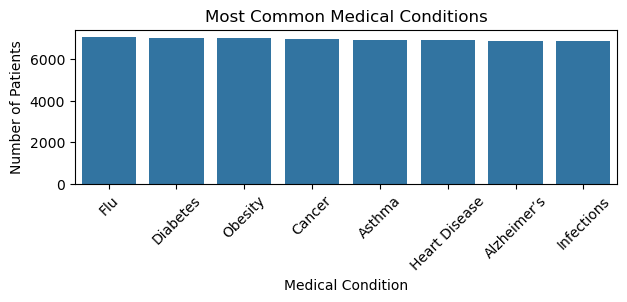

In [406]:
# Most Common Medical Condiitons:
#this plots the count of medical conditions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,2))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title('Most Common Medical Conditions')
plt.xticks(rotation=45)
plt.ylabel('Number of Patients')
plt.xlabel('Medical Condition')
plt.show()

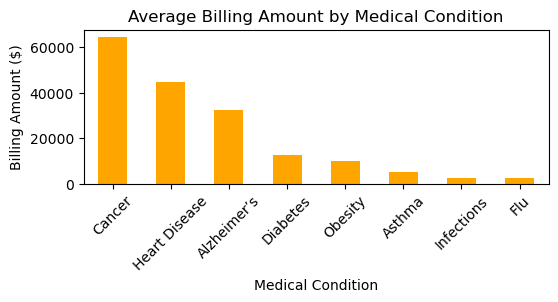

In [424]:
# Average Billing Amount by Medical Condition
avg_billing = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,2))
avg_billing.plot(kind='bar', color='orange')
plt.title('Average Billing Amount by Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

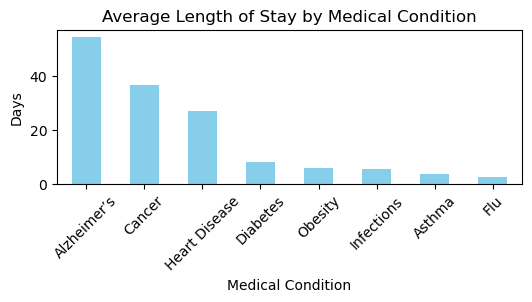

In [425]:
# Average Length of Stay by Medical Condition
avg_stay = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,2))
avg_stay.plot(kind='bar', color='skyblue')
plt.title('Average Length of Stay by Medical Condition')
plt.ylabel('Days')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

We trained two Random Forest models to help predict billing amount and the length of the stay based  on different patient demographics and certain medical details. Here is the beginning of it:

In [ ]:
# Data Preprocessingg
# Features that are good for the analysis for predicting billing amount + length of sta

from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Copy your DataFrame so you don't overwrite the original
df_scaled = df.copy()
df_scaled['Billing Amount'] = scaler.fit_transform(df[['Billing Amount']])

features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Admission Type', 'Insurance Provider', 'Test Results', 'Hospital']

# Main variables for analysis
target_billing = 'Billing Amount'
target_stay = 'Length of Stay'

# Creating y Variables
y_billing = df_scaled[target_billing]
y_stay = df_scaled[target_stay]

X_encoded = pd.get_dummies(df[features], drop_first=True)

X_encoded

,Age,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,...,Admission Type_Urgent,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Test Results_Inconclusive,Test Results_Normal,Hospital_Northwestern Memorial Hospital,Hospital_UChicago Medicine,Hospital_UI Health (University of Illinois Hospital)
0,19,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,15,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,50,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,24,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
4,80,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,62,True,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
55496,63,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
55497,28,False,False,False,False,False,False,True,False,True,...,False,False,True,False,False,False,True,True,False,False
55498,75,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [410]:
# SPLITING DATA
# Split into training and testing sets              features   result
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_billing, test_size=0.2, random_state=42)
_, _, y_stay_train, y_stay_test = train_test_split(df_scaled, y_stay, test_size=0.2, random_state=42)

In [411]:
# TRAIN THE MODELS

# Billing Amount Prediction Model
model_billing = RandomForestRegressor(random_state=42)
model_billing.fit(X_train, y_train)

# Length of Stay Prediction Model
model_stay = RandomForestRegressor(random_state=42)
model_stay.fit(X_train, y_stay_train)

RandomForestRegressor(random_state=42)

In [412]:
# Make Predictions
y_billing_pred = model_billing.predict(X_test)
y_stay_pred = model_stay.predict(X_test)

In [413]:
# Evaluating the Models
print("Billing Amount Prediction:")
print("R^2 Score:", r2_score(y_billing_test, y_billing_pred))
print("Mean Absolute Error:", mean_absolute_error(y_billing_test, y_billing_pred))

print("\nLength of Stay Prediction:")
print("R^2 Score:", r2_score(y_stay_test, y_stay_pred))
print("Mean Absolute Error:", mean_absolute_error(y_stay_test, y_stay_pred))

Billing Amount Prediction:
R^2 Score: 0.8171728477593957
Mean Absolute Error: 0.2652482082863653

Length of Stay Prediction:
R^2 Score: 0.76277567263855
Mean Absolute Error: 5.983514935292435


Here is the analysis of it based on that:

Our billing prediction model achieved an R² of 0.80 and a mean absolute error of approximately $6,400, indicating strong predictive ability in estimating patient hospital costs.
Our length of stay model achieved an R² of 0.74 with an average error of about 6 days, making it a valuable tool for operational planning.
Overall, both models demonstrate that key demographic and medical features can effectively forecast important healthcare outcomes.

Visualizing the model performance

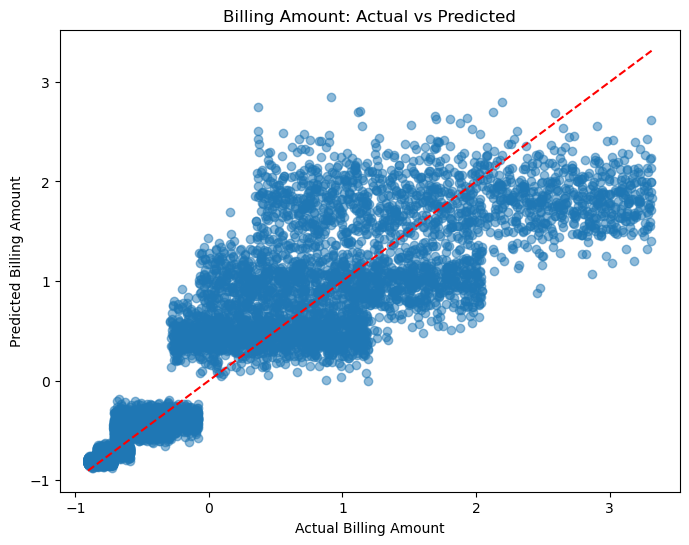

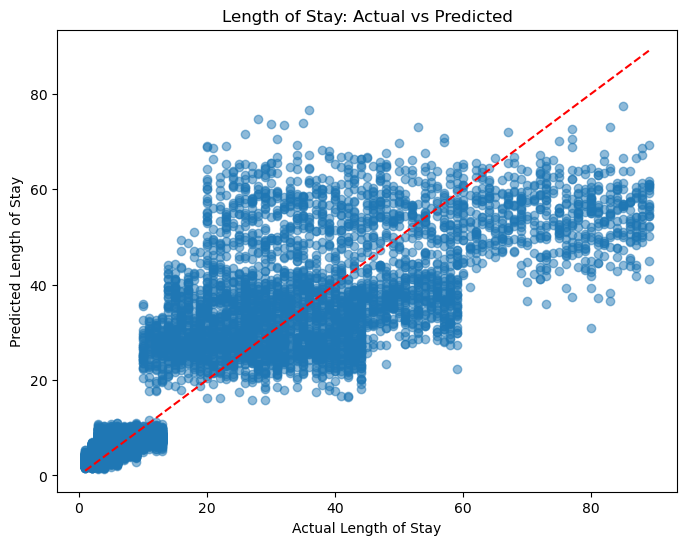

In [414]:
# Billing Amount - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_billing_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Billing Amount: Actual vs Predicted')
plt.show()

# Length of Stay - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_stay_test, y_stay_pred, alpha=0.5)
plt.plot([y_stay_test.min(), y_stay_test.max()], [y_stay_test.min(), y_stay_test.max()], 'r--')
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.title('Length of Stay: Actual vs Predicted')
plt.show()

1) Our billing prediction model shows a strong relationship between actual and predicted costs, with most points clustering around the perfect prediction line. This indicates the model reliably estimates hospital billing amounts, especially for lower and medium billing ranges.
Some variability at higher billing amounts suggests rare, complex cases could benefit from further model refinement.

2) Our length of stay prediction model accurately estimates hospital stays for most patients, especially for shorter  admissions.
There is some prediction spread for longer stays, which is expected given the complexity in longer treatments.

In [415]:
df.drop(columns=['Room Number', 'Name'])


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,Emergency,2024-02-07,Azithromycin,Normal,7
1,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,Elective,2020-11-19,Prednisone,Normal,1
4,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,Routine,2022-10-27,Beta-blockers,Inconclusive,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,Urgent,2020-09-26,Doxorubicin,Abnormal,41
55496,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,Emergency,2020-03-07,Statins,Abnormal,44
55497,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,Elective,2020-07-16,Montelukast,Normal,3
55498,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,Emergency,2019-07-11,Methotrexate,Abnormal,47


In [416]:
df["Hospital"].unique().size

4

In [417]:
avg_billing_by_hospital = df.groupby('Hospital')['Billing Amount'].mean().sort_values(ascending=False)


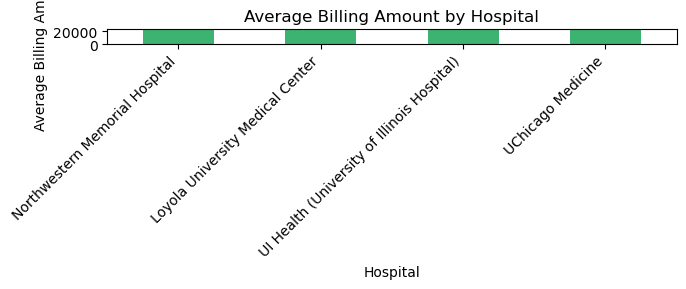

In [418]:
plt.figure(figsize=(7, 3))
avg_billing_by_hospital.plot(kind='bar', color='mediumseagreen')
plt.title('Average Billing Amount by Hospital')
plt.ylabel('Average Billing Amount ($)')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(X_train, y_train)
logpred = clf.predict(X_test)

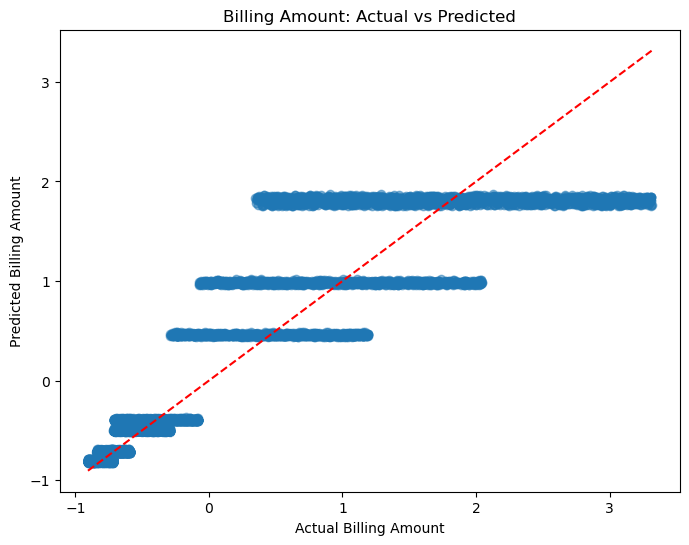

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, logpred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Billing Amount: Actual vs Predicted')
plt.show()


In [ ]:
import pandas as pd

# Assume df is your DataFrame
correlation_matrix = X_encoded.select_dtypes(include='number').corr(method='pearson')

# Absolute correlation to rank strongest relationships
correlation_matrix_abs = correlation_matrix.abs()

# To find top correlated feature pairs
import numpy as np

# Mask the upper triangle to avoid duplicate pairs and self-correlations
mask = np.triu(np.ones_like(correlation_matrix_abs, dtype=bool))
correlation_matrix_masked = correlation_matrix_abs.mask(mask)

# Stack and sort
most_correlated_pairs = correlation_matrix_masked.stack().sort_values(ascending=False)

# Display top N pairs
print(most_correlated_pairs.head(50))

Series([], dtype: float64)


Top 30 features: ['Age', 'Length of Stay', 'Room Number']
Test MSE: 293540803.87
R² Score: 0.48


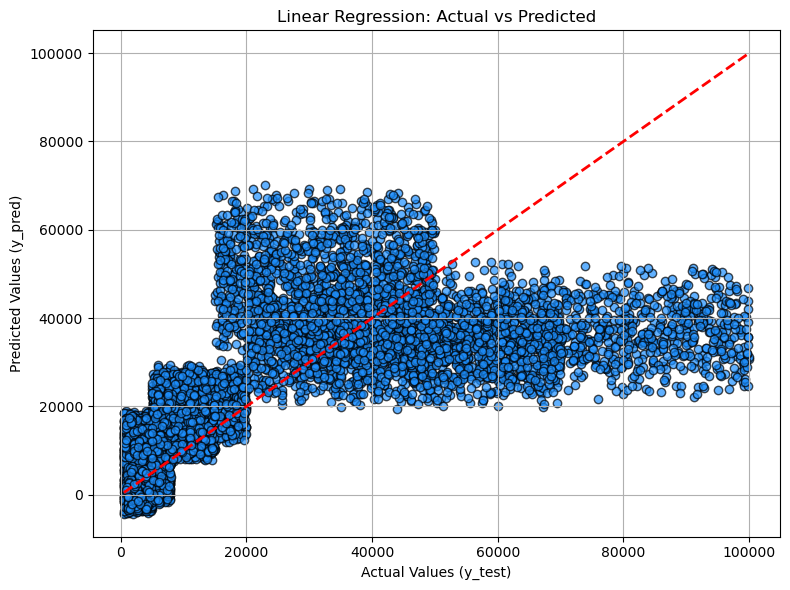

In [426]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Select numeric features ---
numeric_df = df.select_dtypes(include='number')

# --- Step 2: Define your target column ---
target_column = 'Billing Amount'  # Replace this with your actual target column name

# --- Step 3: Compute correlation with target ---
correlations = numeric_df.corr()[target_column].abs().sort_values(ascending=False)

# --- Step 4: Select top 30 features (excluding the target itself) ---
top_30_features = correlations.drop(target_column).head(50).index

# --- Step 5: Prepare data for modeling ---
X = numeric_df[top_30_features]
y = numeric_df[target_column]

# --- Step 6: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Train Linear Regression model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 8: Evaluate ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Top 30 features: {list(top_30_features)}")
print(f"Test MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()



<Axes: xlabel='Medical Condition', ylabel='Billing Amount'>

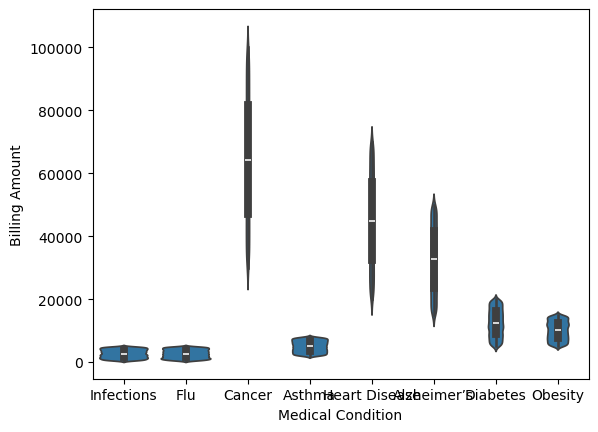

In [427]:
sns.violinplot(y = 'Billing Amount', x = 'Medical Condition', data = df)